In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
def find_nearest(array,value):
    from numpy import abs
    index = (abs(array-value)).argmin()
    return index

In [102]:
filename = str(7200) + '-' + str(56674) + '-' + str(208)
g = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Wave and Flux/'+filename+'.csv',index_col=False)

In [103]:
wave = g['Wavelength']
flux = g['Flux']

In [104]:
center = find_nearest(wave,16811)
center
L1 = center - 240 # ~ 56 Angstroms
L2 = center - 151 # ~ 35 Angstroms
R1 = center + 150
R2 = center + 241

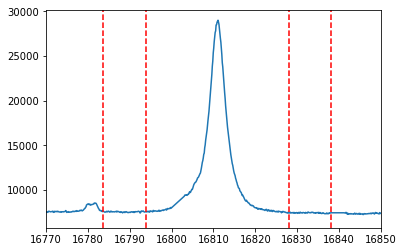

In [105]:
plt.plot(wave,flux);
plt.xlim(16770,16850);
plt.axvline(wave[L1],color='red',ls='dashed');
plt.axvline(wave[L2],color='red',ls='dashed');
plt.axvline(wave[R1],color='red',ls='dashed');
plt.axvline(wave[R2],color='red',ls='dashed');

In [106]:
leftwindow = np.mean(flux[L1:L2])
rightwindow = np.mean(flux[R1:R2])
cmean = (0.5)*(leftwindow + rightwindow)
linemean = np.mean(flux[L2:R1])

In [107]:
lefterr = np.std(flux[L1:L2])
righterr = np.std(flux[R1:R2])
cerr = (0.5)*(lefterr + righterr)

In [108]:
(linemean - cmean)/cerr

79.89751651176256

In [109]:
n_l = len(wave[L2:R1])
n_c = len(wave[L1:L2])+len(wave[R1:R2])
snr = 404
l = linemean
c = cmean
dellam = wave[L1+1]-wave[L1]
r = l/c

In [110]:
top = n_l*(dellam)**2
bottom = snr**2
blah = (top/bottom)*(r/n_c)*(r+n_c)
sigmur = np.sqrt(blah)

In [111]:
sigmur

0.0060497071232869992

In [112]:
cerr

46.24752482077395

In [73]:
from astropy.io import fits

In [100]:
filepath = '/Volumes/CoveyData-1/APOGEE_Spectra/python_DR13/dr13/apogee/spectro/redux/r6/apo25m/7200/56674/apVisit-r6-7200-56674-208.fits'
gg = fits.open(filepath)
hdu = gg[0]

In [101]:
hdu.header['SNR']

403.939

In [118]:
def Confidence_Level(file):

    from astropy.io import fits
    import numpy as np
    import pandas as pd

    gg = pd.read_csv(file)
    snr = []
    for index,row in gg.iterrows():
        
        plate = int(row['Plate ID'])
        mjd = int(row['MJD'])
        fiber = int(row['Fiber'])

        if len(str(fiber)) == 3:
            fiber = str(row['Fiber'])
        elif len(str(fiber)) == 2:
            fiber = '0' + str(row['Fiber']) 
        else:
            fiber = '00' + str(fiber)

        filepath = str(plate) + '/' + str(mjd) + '/apVisit-r6-' + str(plate) + '-' + str(mjd) + '-' + str(fiber)
        fullpath = '/Volumes/CoveyData-1/APOGEE_Spectra/python_DR13/dr13/apogee/spectro/redux/r6/apo25m/' + filepath + '.fits'

        openedfits = fits.open(fullpath)
        hdu = openedfits[0]
        SNR = hdu.header['SNR']
        openedfits.close()
        snr.append(SNR)
    return snr

        

In [119]:
xy = Confidence_Level('/Users/ballanr/Desktop/File Outputs/100001-200001 Equivs.csv')

(0, 650)

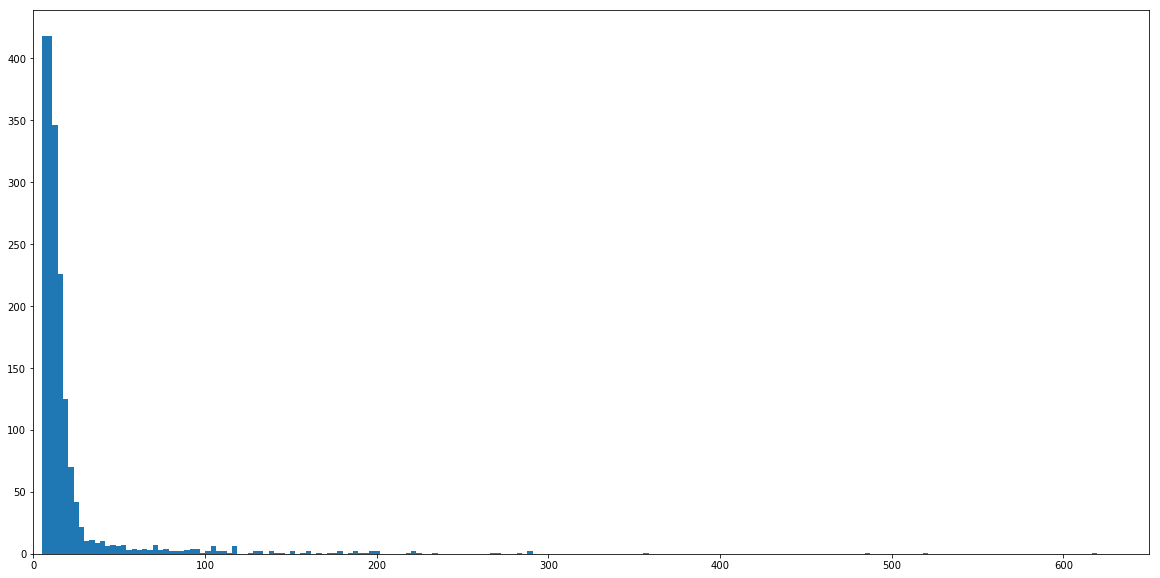

In [133]:
plt.figure(figsize=(20,10));
plt.hist(xy,bins=200);
plt.xlim(0,650)

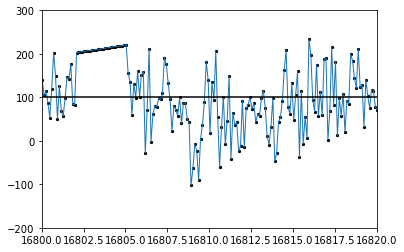

In [75]:
filename = str(5645) + '-' + str(55967) + '-' + str(149) 
g = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Wave and Flux/'+filename+'.csv')
x1 = g['Wavelength']
y1 = g['Flux']
plt.plot(x1,y1,linewidth=1);
plt.scatter(x1,y1,color='black',s=5)
plt.xlim(16800,16820);
plt.ylim(-200,300);
plt.axvline(15862.49,color='black');
plt.axhline(100,color='black');

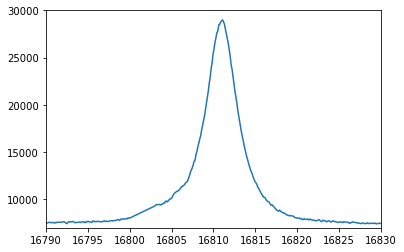

In [52]:
filename = str(7200) + '-' + str(56674) + '-' + str(208) 
g = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Wave and Flux/'+filename+'.csv')
x1 = g['Wavelength']
y1 = g['Flux']
plt.plot(x1,y1);
plt.xlim(16790,16830);
plt.ylim(7000,30000);
plt.axvline(15862.49,color='black');
plt.axhline(100,color='black');

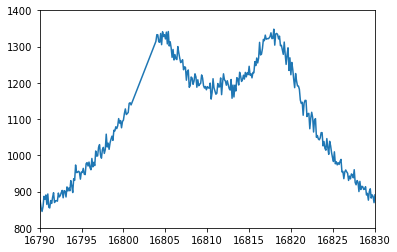

In [54]:
filename = str(7194) + '-' + str(56646) + '-' + str(161) 
g = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Wave and Flux/'+filename+'.csv')
x1 = g['Wavelength']
y1 = g['Flux']
plt.plot(x1,y1);
plt.xlim(16790,16830);
plt.ylim(800,1400);
plt.axvline(15862.49,color='black');
plt.axhline(100,color='black');

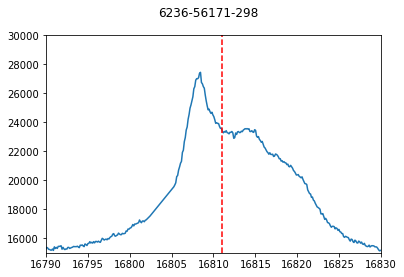

In [60]:
filename = str(6236) + '-' + str(56171) + '-' + str(298) 
g = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Wave and Flux/'+filename+'.csv')
x1 = g['Wavelength']
y1 = g['Flux']
plt.plot(x1,y1);
plt.xlim(16790,16830);
plt.ylim(15000,30000);
plt.axvline(16811,ls='dashed',color='red');
#plt.axhline(100,color='black');
plt.suptitle('6236-56171-298')
plt.savefig('/Users/ballanr/Desktop/6236-56171-298.jpg',dpi=300)